<a href="https://colab.research.google.com/github/novemberrain123/movies-notebook/blob/master/RDS1S3G1_LimHangShen_LimJunShen_GanYihWee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Member:

Lim Hang Shen (19WMR12640)

Gan Yih Wee (19MWR11872)

Lim Jun Shen (19WMR12596)

# Business Understanding
Our client is a movie studio who wants us to:


*   Explore the data to discover current trends.
      *   Try to correlate vote count and revenue.
      *   Correlate directors' obtained vote average and the number of movies they made.
      *   Explore the most popular genres in recent years.
      *   Analyse the best month to release a movie.
      *   Figure the correlation between the budget and revenue of a movie
*   Predict the genre of a movie based on texts related to movie.
*   Predict the revenue of upcoming movies based on movie features.




# Data Understanding


##Data collection

1. Mount drive in google colab
2. Upload data to Shared drives/DS Assignment/
3. Load .csv files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Our data is limited to movies released before 2018. Therefore the trends may have changed slightly than what we're predicting here. 

We're using the movies dataset from kaggle [here](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=credits.csv). We tried to use the kaggle API to download the data but it seemed more hassle than worth for such a small dataset. So we just did it manually.


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
movies=pd.read_csv("/content/drive/Shared drives/DS Assignment/movies_metadata.csv")
credits=pd.read_csv("/content/drive/Shared drives/DS Assignment/credits.csv")
keywords=pd.read_csv("/content/drive/Shared drives/DS Assignment/keywords.csv")

We wanna merge the movies and credits dataframes. Let's look at their columns properties.

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


We will have to change id type to str for both of them.

In [ ]:
movies['id'] = movies['id'].astype('|S')
credits['id'] = credits['id'].astype('|S')

movies= movies.merge(credits,on='id')

In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,b'15602',tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,b'31357',tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,b'11862',tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."




* belongs_to_collection - The collection of the movie belongs to.
* budget - The budget in which the movie was made.
* genres - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - A unique identifier for each movie.
* imdb_id - The movie id in IMDB website.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* poster_path - Url path to get the movie poster.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* spoken_languages - Language spoken in the movie.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average - average ratings the movie recieved.
* vote_count - the count of votes recieved.
* cast - The casted actors/actresses in the movie
* crew - The crew as listed in the credits


In [ ]:
movies.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
45533,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,b'439050',tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
45534,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,b'111109',tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
45535,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,b'67758',tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
45536,False,NaN,0,[],NaN,b'227506',tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."
45537,False,NaN,0,[],NaN,b'461257',tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,0.163015,/s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0,[],"[{'credit_id': '593e676c92514105b702e68e', 'de..."


In [ ]:
movies.shape

(45538, 26)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45538 non-null  object 
 1   belongs_to_collection  4500 non-null   object 
 2   budget                 45538 non-null  object 
 3   genres                 45538 non-null  object 
 4   homepage               7792 non-null   object 
 5   id                     45538 non-null  object 
 6   imdb_id                45521 non-null  object 
 7   original_language      45527 non-null  object 
 8   original_title         45538 non-null  object 
 9   overview               44584 non-null  object 
 10  popularity             45535 non-null  object 
 11  poster_path            45152 non-null  object 
 12  production_companies   45535 non-null  object 
 13  production_countries   45535 non-null  object 
 14  release_date           45451 non-null  object 
 15  re

In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
keywords.tail()

,id,keywords
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]
46418,461257,[]


In [ ]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


*   keywords - Words related to the movie

## Exploratory data analysis

In [ ]:
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from matplotlib import pyplot as plt,cm
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

Checking for the statistics of numerical columns only.

In [ ]:
movies.describe(include=[np.number])

,revenue,runtime,vote_average,vote_count
count,4.553500e+04,45278.000000,45535.000000,45535.000000
mean,1.119860e+07,94.128517,5.618232,109.791128
std,6.428227e+07,38.396184,1.924203,490.920864
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Checking for the statistics for string/object type columns only.

In [ ]:
movies.describe(include=['O'])

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video,cast,crew
count,45538,4500,45538,45538,7792,45538,45521,45527,45538,44584,45535,45152,45535,45535,45451,45535,45454,20439,45535,45535,45538,45538
unique,2,1695,1223,4066,7670,45432,45415,89,43370,44305,44174,45020,22707,2390,17333,1931,6,20283,42276,2,43019,44669
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,b'141971',tt1180333,en,Blackout,No overview found.,0.0,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Which one is the first to return - memory or t...,Blackout,False,[],[]
freq,45529,29,36626,5008,12,9,9,32316,12,133,34,9,11896,17873,136,22425,45087,9,13,45442,2420,771


Plot histograms of column values for each numerical column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f025f617400>,
      dtype=object)

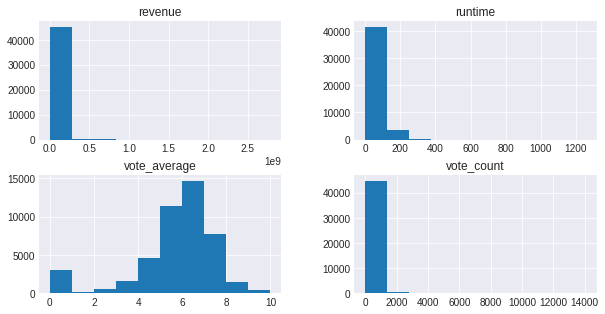

In [ ]:
movies.select_dtypes(include=np.number).hist()

Plot the count of unique values in the index.

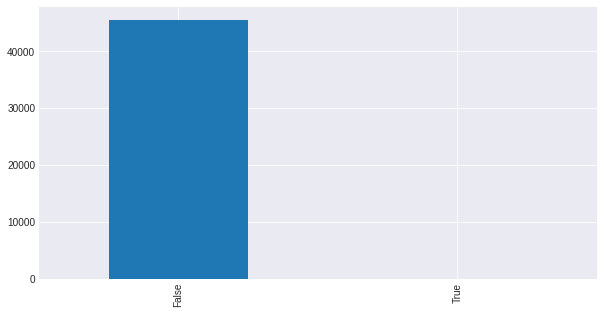

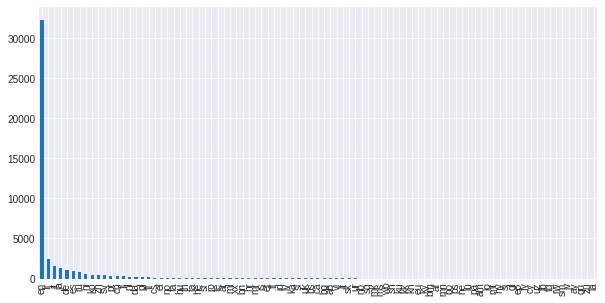

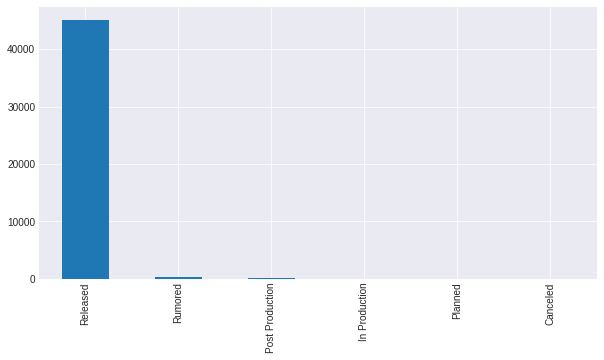

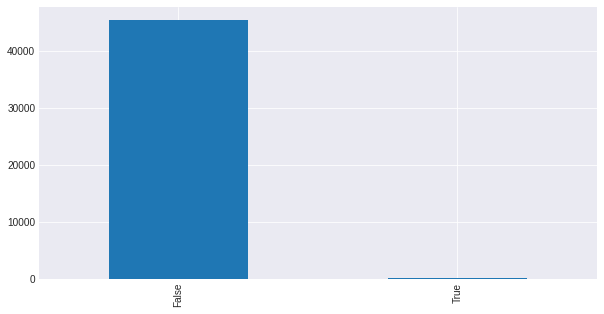

In [ ]:
for object in ['adult','original_language','status','video']:
  plt.figure()
  movies[object].value_counts().plot.bar()
  plt.show()
  
 
  

Percentage of missing values in each column.

In [ ]:
movies.isna().mean()

adult                    0.000000
belongs_to_collection    0.901181
budget                   0.000000
genres                   0.000000
homepage                 0.828890
id                       0.000000
imdb_id                  0.000373
original_language        0.000242
original_title           0.000000
overview                 0.020950
popularity               0.000066
poster_path              0.008476
production_companies     0.000066
production_countries     0.000066
release_date             0.001910
revenue                  0.000066
runtime                  0.005710
spoken_languages         0.000066
status                   0.001845
tagline                  0.551166
title                    0.000066
video                    0.000066
vote_average             0.000066
vote_count               0.000066
cast                     0.000000
crew                     0.000000
dtype: float64

Percentage of missing values for the entire dataframe.

In [ ]:
movies.isna().mean(axis=1).mean()

0.08928215488669108

Find out the rows where the title consists of null value.

In [ ]:
movies.loc[movies.title.isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
19801,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,b'82663',tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'cast_id': 12, 'character': 'Sean Dillon', '...","[{'credit_id': '52fe48659251416c9108b001', 'de..."
29584,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,b'122662',tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'cast_id': 5, 'character': 'Rune Balot', 'cr...","[{'credit_id': '52fe4a7fc3a368484e156c65', 'de..."
35667,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,b'249260',tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'cast_id': 3, 'character': 'Wade', 'credit_i...","[{'credit_id': '52fe4f40c3a36847f82c8845', 'de..."


Plot correlation of missing values between columns.

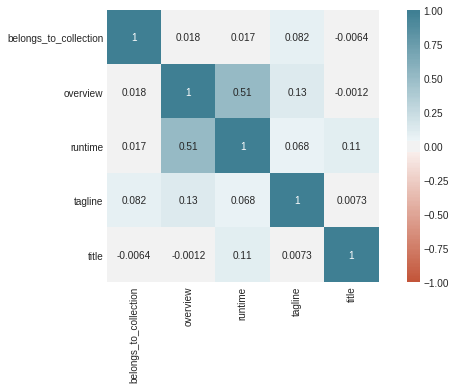

In [ ]:
null_columns=movies[['belongs_to_collection','overview','runtime','tagline', 'title']]
sns.heatmap(null_columns.isnull().corr(), 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)

Plot correlation matrix for numerical features.

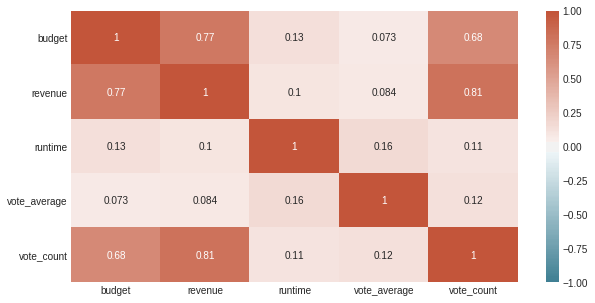

In [ ]:
movies['budget'] = movies['budget'].astype(float)

sns.heatmap(movies.select_dtypes(include=np.number).corr(), 
            vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200),annot=True)
#We'll take a closer look at columns that are closely related.

Drop movies where revenue and budget information is not available as it is an important column for analysis. Then, we plot the boxplot of budget and revenue and also their regression plot. Finally, both rmse and r2 score for budget and revenue features are calculated.

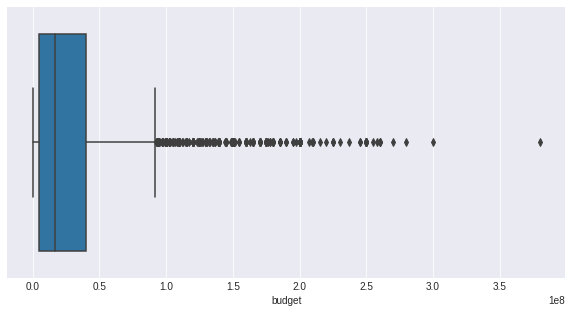

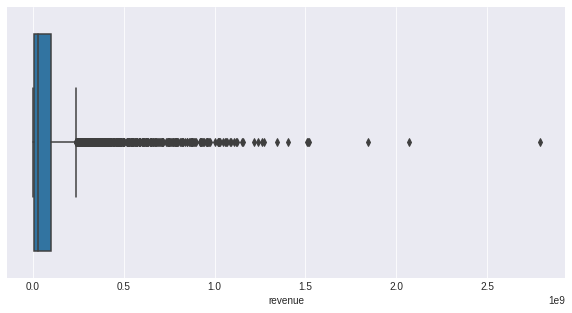

RMSE: 2.2924711898685624e+16
R2:0.1678201658987698
(5393, 26)


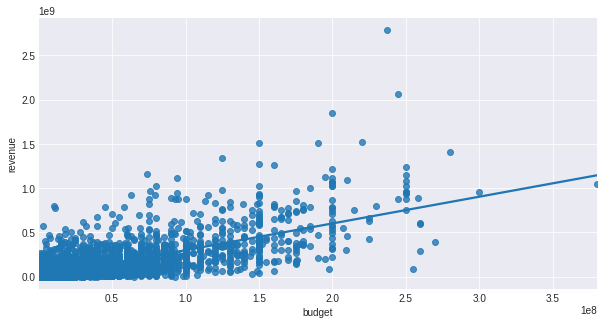

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math
movies.reset_index()
movies1 = movies.drop(movies[(movies.budget == 0) | (movies.revenue == 0) | (movies.revenue.isnull())].index)
def bplotBandR(df,x,y):
  plt.figure()
  sns.boxplot(x=df[x])
  plt.show()
  plt.figure()
  sns.boxplot(x=df[y])
  plt.show()

bplotBandR(movies1,'budget','revenue')
sns.regplot(movies1['budget'],movies1['revenue'],ci=10)

def printScore(df,x,y):
  rmse = float(mean_squared_error(df[x],df[y],squared=True))
  r2 = r2_score(df[y],df[x])
  print("RMSE: "+str(rmse))
  print("R2:"+str(r2))
  print(df.shape)

printScore(movies1,'budget','revenue')

Remove outliers once where we compare the boxplot, regression plot,rmse and r2 score we get from above. Then, we plot the boxplox and regression plot and compute the rmse and r2 score again to see the difference.

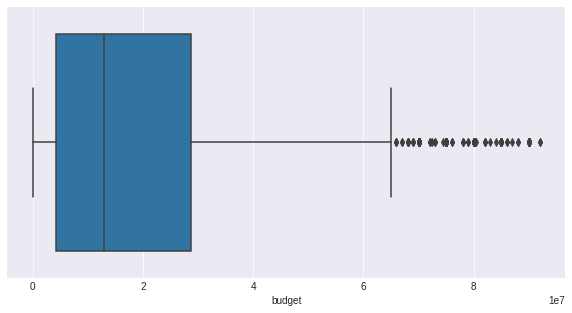

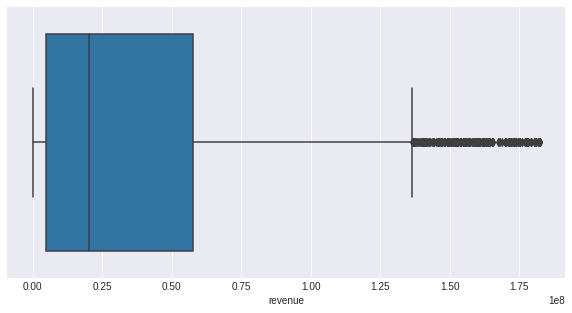

RMSE: 1741617189996987.0
R2:0.1159330222457512
(4578, 26)


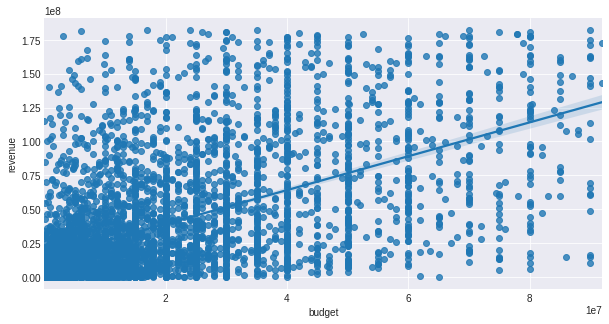

In [ ]:
def removeOutliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1    #IQR is interquartile range. 

  filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
  return df[filter]


moviesR = removeOutliers(movies1,'budget')
moviesR = removeOutliers(moviesR,'revenue')

bplotBandR(moviesR,'budget','revenue')
sns.regplot(moviesR['budget'],moviesR['revenue'])
printScore(moviesR,'budget','revenue')

Convert the data type of release date from object to datatime.

In [ ]:
import datetime as dt
movies['release_date']= pd.to_datetime(movies['release_date']) 
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45538 non-null  object        
 1   belongs_to_collection  4500 non-null   object        
 2   budget                 45538 non-null  float64       
 3   genres                 45538 non-null  object        
 4   homepage               7792 non-null   object        
 5   id                     45538 non-null  object        
 6   imdb_id                45521 non-null  object        
 7   original_language      45527 non-null  object        
 8   original_title         45538 non-null  object        
 9   overview               44584 non-null  object        
 10  popularity             45535 non-null  object        
 11  poster_path            45152 non-null  object        
 12  production_companies   45535 non-null  object        
 13  p

Here we plot the pie chart for number of movies released based on month.

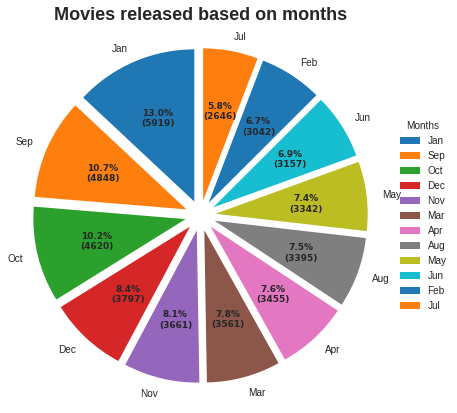

In [ ]:
import calendar as cl

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

data_months = movies['release_date'].dt.month.value_counts()

def createPieChart(data):
  months = data.index
  months_name = []
  for m in months:
    m=int(m)
    months_name.append(cl.month_abbr[m])

  fig, ax = plt.subplots(figsize =(10, 7)) 
  wedges, texts, autotexts = ax.pie(data,  
                                    autopct = lambda pct: func(pct, data), 
                                    explode = explode,
                                    labels = months_name,  
                                    startangle = 90) 
    
  # Adding legend 
  ax.legend(wedges, months_name, 
            title ="Months", 
            loc ="center left", 
            bbox_to_anchor =(1, 0, 0.5, 1)) 
    
  plt.setp(autotexts, size = 9, weight ="bold",fontname="Times New Roman") 
  ax.set_title("Movies released based on months",fontweight="bold",fontsize=18) 
    
  # show plot 
  plt.show() 

createPieChart(data_months)


Plotting the bar chart for average revenue per month.

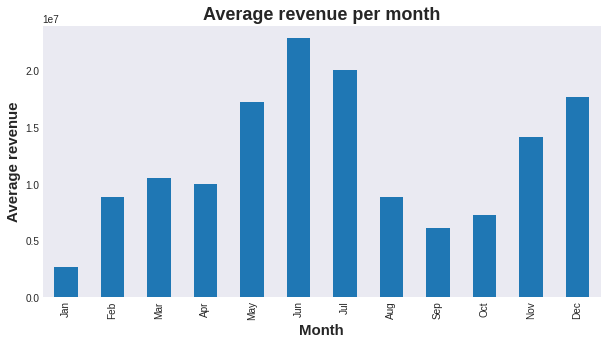

In [ ]:
movies['bins'] = movies['release_date'].dt.month
data_revenue = movies.groupby('bins')['revenue'].aggregate(np.mean)
plt.figure()
months_to_revenue = data_revenue.plot.bar()
months_to_revenue.set_ylabel('Average revenue',fontweight="bold",fontsize=15)
months_to_revenue.set_title('Average revenue per month',fontweight="bold",fontsize=18)
months_to_revenue.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
months_to_revenue.set_xlabel('Month',fontweight="bold",fontsize=15)
plt.grid()
plt.show()

The following is the bubble plot for number of movies made and the vote average of directors.

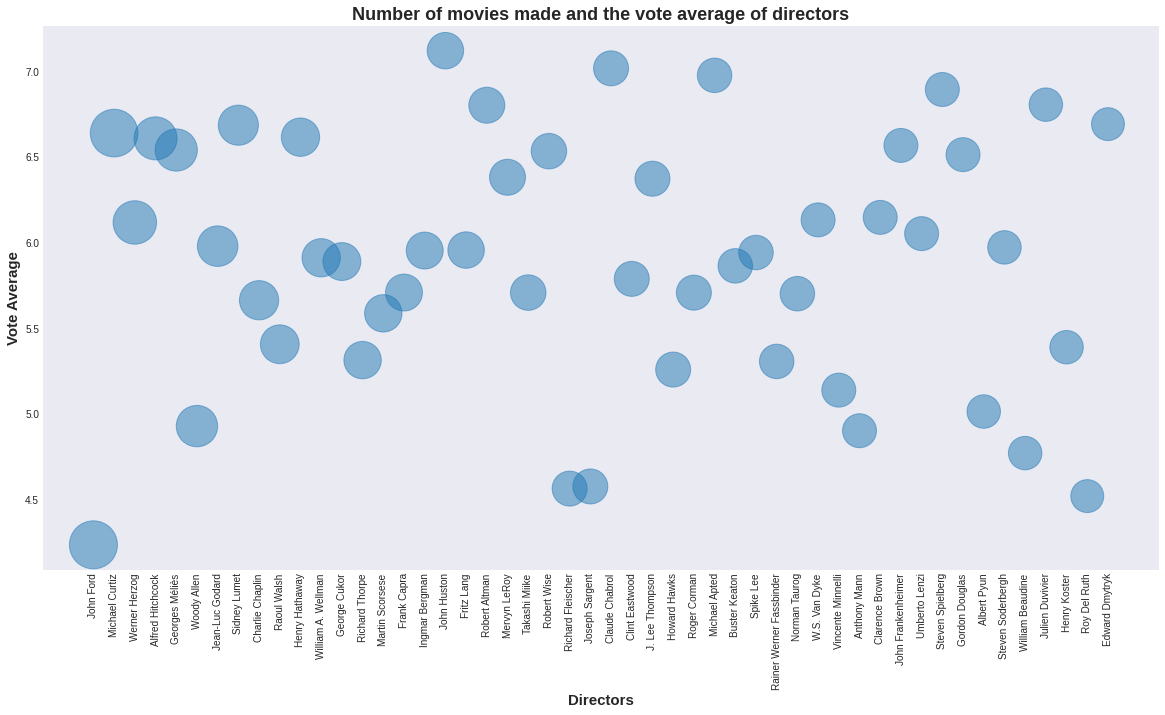

In [ ]:
import re
movies['director'] = movies['crew'].str.extract("'Director', 'name': '([A-Za-zÀ-ÖØ-öø-ÿ \-\.]*)")
director = movies['director'].value_counts().index[:50].tolist()
directorTop50 = movies.loc[movies['director'].isin(director)]
voteAverage = directorTop50.groupby(['director'], as_index=True)['vote_average'].aggregate(np.mean)
numOfMovies = directorTop50['director'].value_counts()

plt.figure(figsize=(20,10))
plt.scatter(director, voteAverage, s=numOfMovies*35, alpha=0.5)
plt.title('Number of movies made and the vote average of directors',fontweight="bold",fontsize=18)
plt.xlabel('Directors',fontweight="bold",fontsize=15)
plt.ylabel('Vote Average',fontweight="bold",fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Formatted the genres columns.

In [ ]:
x = movies['genres'].str.extractall("'name': '([a-zA-Z]*)")
x = x.reset_index(level=[0,1])
x.columns = ['A', 'B', 'C']
x = x.groupby(['A'])['C'].apply(lambda x: ','.join(x.astype(str))).reset_index()
movies['genres'] = x['C']
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
1,False,NaN,65000000.0,"Adventure,Fantasy,Family",NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"Romance,Comedy",NaN,b'15602',tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",12.0,Howard Deutch
3,False,NaN,16000000.0,"Comedy,Drama,Romance",NaN,b'31357',tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",12.0,Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,Comedy,NaN,b'11862',tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",2.0,Charles Shyer


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45538 non-null  object        
 1   belongs_to_collection  4500 non-null   object        
 2   budget                 45538 non-null  float64       
 3   genres                 43096 non-null  object        
 4   homepage               7792 non-null   object        
 5   id                     45538 non-null  object        
 6   imdb_id                45521 non-null  object        
 7   original_language      45527 non-null  object        
 8   original_title         45538 non-null  object        
 9   overview               44584 non-null  object        
 10  popularity             45535 non-null  object        
 11  poster_path            45152 non-null  object        
 12  production_companies   45535 non-null  object        
 13  p

Explode the dataframe by genres for plotting purpose. 

In [ ]:
movies.genres = movies.genres.str.split(',')
moviesplot=movies.explode('genres')
moviesplot.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Animation,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Comedy,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Family,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
1,False,NaN,65000000.0,Adventure,NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston
1,False,NaN,65000000.0,Fantasy,NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston


In [ ]:
moviesplot.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Animation,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Comedy,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Family,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
1,False,NaN,65000000.0,Adventure,NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston
1,False,NaN,65000000.0,Fantasy,NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston


Next, we do spaghetti plot for the top 5 genres and get the standard deviation of average ratings over years for each genre.

Standard deviation of average ratings over years for each genre
Drama: 0.07851104598565462
Comedy: 0.1093735600429454
Thriller: 0.19640068414954873
Action: 0.17099406314889679
Romance: 0.14627232002251123


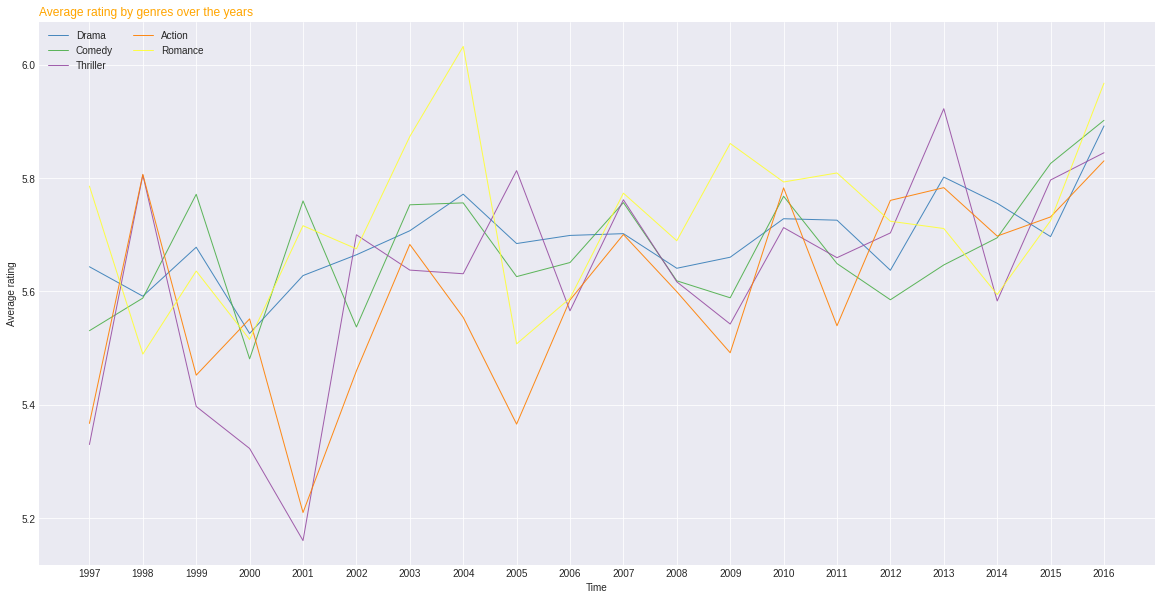

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot

x =[]
for z in range (1997,2017):
  x.append(z)


moviesRecent20 = moviesplot.loc[moviesplot.release_date.dt.year.isin(x)]
moviesRecent20['bins'] = moviesRecent20['release_date'].dt.year
moviesRecent20 = moviesRecent20.drop(moviesRecent20[moviesRecent20.genres.isnull()].index)

num=0
g=moviesRecent20['genres'].value_counts().index.tolist()[:5]
print("Standard deviation of average ratings over years for each genre")
for column in g:
  num+=1

  plt.plot(x, moviesRecent20.loc[moviesRecent20.genres==column].groupby('bins')['vote_average'].aggregate(np.mean), marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
  print(column+": "+str((moviesRecent20.loc[moviesRecent20.genres==column].groupby('bins')['vote_average'].aggregate(np.mean)).aggregate(np.std)))
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Average rating by genres over the years", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Average rating")
plt.locator_params(axis='x', nbins=40)

x=list(map(str,x))
ax.set_xticks(range(1997,2017))



Now we visualise the relationships between budget, popularity and runtime with revenue.

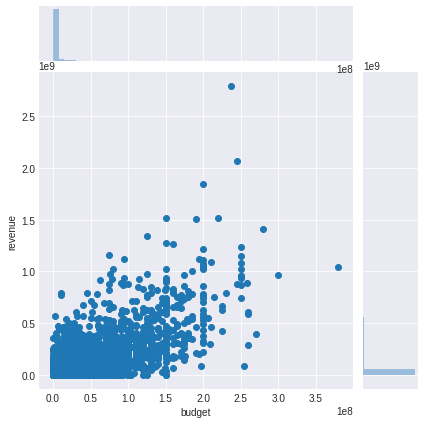

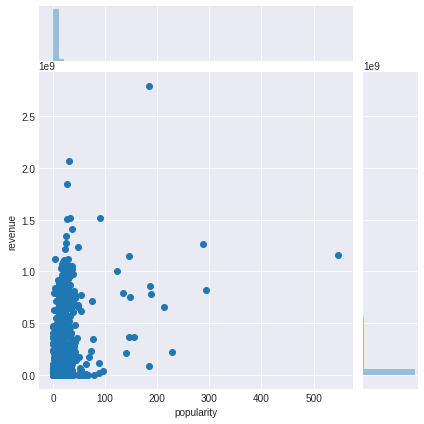

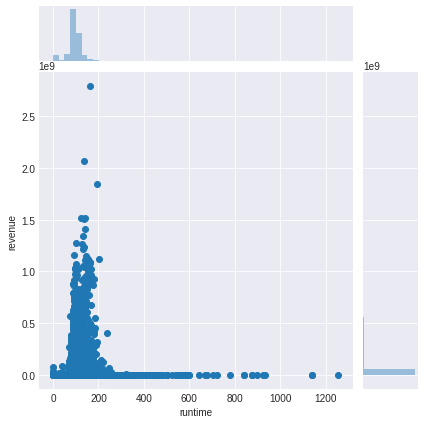

In [ ]:
sns.jointplot(movies.budget, movies.revenue);
sns.jointplot(movies.popularity, movies.revenue);
sns.jointplot(movies.runtime, movies.revenue);
plt.show()

We plot a three-dimension scatter plot for budget, runtime, popularity and revenue

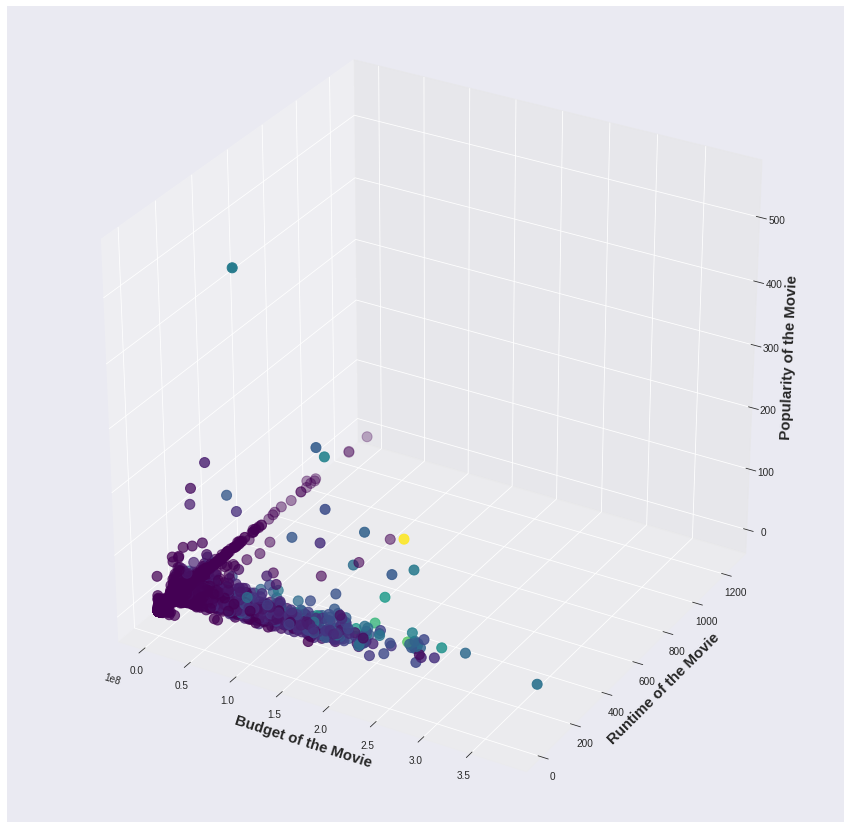

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
movies['popularity'] = movies['popularity'].astype(float)
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111,projection = '3d')
ax.scatter(movies['budget'],movies['runtime'],movies['popularity'], c = movies['revenue'],cmap='viridis', marker = 'o', s = 100)
ax.set_xlabel('Budget of the Movie',fontsize=15, fontweight="bold")
ax.set_ylabel('Runtime of the Movie',fontsize=15, fontweight="bold")
ax.set_zlabel('Popularity of the Movie',fontsize=15, fontweight="bold")
plt.show()

Lastly, we create a wordcloud which contains the most used words in overview, keywords & tagline of movies. Let's merge the keywords csv with our movies csv.

In [ ]:
keywords['id']=keywords['id'].astype('|S')
movies= movies.merge(keywords,on='id')

In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",NaN,b'15602',tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",12.0,Howard Deutch,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,b'31357',tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",12.0,Forest Whitaker,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],NaN,b'11862',tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",2.0,Charles Shyer,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
movies.iloc[2]['keywords']

"[{'id': 1495, 'name': 'fishing'}, {'id': 12392, 'name': 'best friend'}, {'id': 179431, 'name': 'duringcreditsstinger'}, {'id': 208510, 'name': 'old men'}]"

In [ ]:
x = movies['keywords'].str.extractall("name': '([a-zA-ZÀ-ÖØ-öø-ÿ \-\.]*)")
x = x.reset_index(level=[0,1])
x.columns = ['A', 'B', 'C']
x = x.groupby(['A'])['C'].apply(lambda x: ','.join(x.astype(str))).reset_index()
movies['keywords'] = x['C']
movies.keywords = movies.keywords.str.split(',')
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter,"[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston,"[board game, disappearance, new home, recluse,..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",NaN,b'15602',tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",12.0,Howard Deutch,"[fishing, best friend, duringcreditsstinger, o..."
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,b'31357',tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",12.0,Forest Whitaker,"[based on novel, interracial relationship, sin..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],NaN,b'11862',tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",2.0,Charles Shyer,"[baby, midlife crisis, confidence, aging, daug..."


The top 20 most common keywords

In [ ]:
from collections import Counter
list_of_keywords = list(movies['keywords'].explode())
list_of_keywords = [i for i in list_of_keywords if str(i)!='nan']
Counter(list_of_keywords).most_common(20)

[('woman director', 3128),
 ('independent film', 1942),
 ('murder', 1314),
 ('based on novel', 841),
 ('musical', 734),
 ('sex', 685),
 ('violence', 651),
 ('biography', 641),
 ('nudity', 636),
 ('revenge', 626),
 ('suspense', 590),
 ('love', 574),
 ('female nudity', 569),
 ('sport', 544),
 ('police', 461),
 ('sequel', 445),
 ('teenager', 441),
 ('duringcreditsstinger', 440),
 ('friendship', 423),
 ('world war ii', 394)]

Generate a wordcloud of the overview, keywords and tagline of the movies to better understand trends.

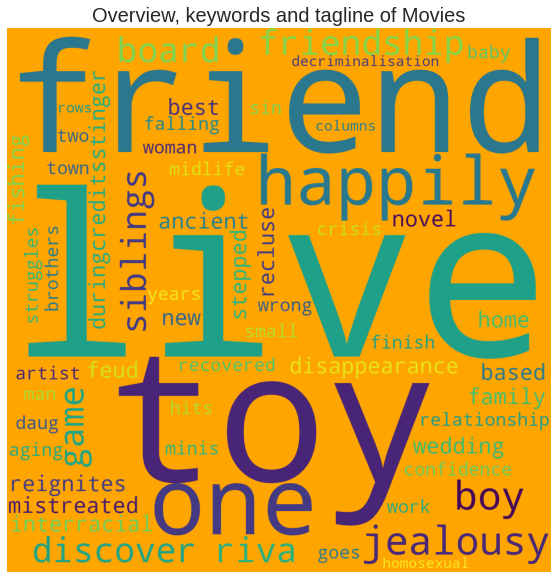

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

stopw = ["dtype","object","Length","series","overview","tagline","keywords","wom","version","encha","professiona","id","name"] + list(STOPWORDS)
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500, stopwords=stopw, regexp=r"\b[a-z]{2,}\b").generate(str(movies[['overview', 'tagline','keywords']]))
plt.title('Overview, keywords and tagline of Movies', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

##Data Understanding Summary

Movies
*   Consists of 45466 entries and 24 columns.
*   Over 90% of belongs_to_collection entries are missing values.
*   Over 50% of tagline entries are missing values.
*   Relevent cross-correlation (> 0.5) between overview and runtime in their values being null.
*   Significant cross-correlation (> 0.8) between revenue and vote_count.
*   Significant cross-correlation (> 0.7) between revenue and budget, after further analysis, initial regression reveals high RMSE and low R2 Score. R2 score lowers after pruning outliers. We hypothesize that this is due to high unpredictability of low budget movies that have even higher presence in data after outlier pruning.
*   More movies are released on the months towards the end of the year and January.
*   On average, higher revenue is made at the middle and the end of the year while June has the highest average revenue during a year.
*   After plotting the scatter graph, we find that there's no relationship between the vote average and the number of movies made by directors.
*  Top 5 genres of the recent 20 years of the data excluding 2017 (1997 to 2016) are drama, romance, comedy, thriller and action.
*  The average rating over the years of the drama genre is the most stable (lowest std) out of top 5 genres, while romance is the most volatile.
*  From the wordcloud of the movie overviews, the most common words are family, toys, discover, live, happily etc. This indicates that most movies have positive themes.


# Data Preparation

In [ ]:
movies.shape

(46628, 29)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  46628 non-null  object        
 1   belongs_to_collection  4574 non-null   object        
 2   budget                 46628 non-null  float64       
 3   genres                 44186 non-null  object        
 4   homepage               8009 non-null   object        
 5   id                     46628 non-null  object        
 6   imdb_id                46611 non-null  object        
 7   original_language      46617 non-null  object        
 8   original_title         46628 non-null  object        
 9   overview               45633 non-null  object        
 10  popularity             46624 non-null  float64       
 11  poster_path            46229 non-null  object        
 12  production_companies   46624 non-null  object        
 13  p

We declare and assign the dataframe for text analytics first as most of the data preprocessing following will be done for the non text analytics dataframe.

In [ ]:
movies_text = movies[['overview','tagline','keywords','genres']]

## General Data Processing

Fill null values in title column with values from original_title


In [ ]:
movies['title']=movies["title"].fillna(movies["original_title"])

Drop meaningless columns

In [ ]:
movies = movies.drop(["homepage","imdb_id","poster_path","original_title"],axis=1)

Unable to retrived any rows using the loc method normally, which means we have to encode the column.

 0 = false , 1 = true and 2 =NaN
 
Checkout the movies where video = 1 (true)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
movies['video']=movies['video'].astype('|S')
movies['video']=le.fit_transform(movies['video'])
movies.loc[movies.video == 1][:5]


,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director,keywords
5540,False,NaN,0.0,"[Horror, Documentary]",b'15173',en,"Get ready as Bob the Tomato, Larry the Cucumbe...",1.734181,"[{'name': 'Big Idea Productions', 'id': 3204}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-10-04,0.0,82.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,1,6.4,22.0,"[{'cast_id': 1, 'character': 'Archibald Aspara...","[{'credit_id': '52fe46419251416c750725c1', 'de...",10.0,Phil Vischer,"[business man, investigation, music, police, s..."
11578,False,"{'id': 123438, 'name': 'Loose Change Collectio...",5000.0,"[Crime, Drama, Mystery, Thriller]",b'14277',en,What if...September 11th was not a surprise at...,0.651714,"[{'name': 'Polar Film Medien GmbH', 'id': 52...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-01,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What really happened on 9/11?,Loose Change: 2nd Edition,1,6.3,16.0,[],"[{'credit_id': '52fe45e19251416c75065955', 'de...",6.0,Dylan Avery,"[alien, giant robot, duringcreditsstinger]"
13708,False,NaN,0.0,"[Drama, Comedy, Romance]",b'284117',en,A short film in which Quran verses are shown a...,0.040068,[],"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2008-03-27,0.0,15.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Fitna,1,1.0,1.0,[],"[{'credit_id': '53d68625c3a3686b85006048', 'de...",3.0,Scarlet Pimpernel,"[supernatural, polar bear, curse, king, witchc..."
14443,False,"{'id': 190135, 'name': 'Love Hina Collection',...",0.0,[Drama],b'44685',ja,"The tests have come, and Keitaro can only hope...",1.785708,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': 'X...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-03-31,0.0,48.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,1,4.7,3.0,"[{'cast_id': 3, 'character': 'Naru Narusegawa'...","[{'credit_id': '52fe4697c3a36847f8107357', 'de...",3.0,Yoshiaki Iwasaki,"[delinquency, independent film]"
14780,False,NaN,0.0,"[Adventure, Drama, History]",b'35148',en,"Ahoy, matey! Your Favorite Playmobil toys have...",0.014168,[],[],2009-10-13,0.0,140.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Playmobil: The Secret of Pirate Island,1,0.0,0.0,"[{'cast_id': 3, 'character': 'Poppy / Pegger /...","[{'credit_id': '52fe45979251416c91037a47', 'de...",10.0,Alexander E. Sokoloff,"[sexual identity, lesbian relationship, homose..."


After looking at a few movies where 'video' = 1 (true) , we believe that it means the movie was only released on video.

If the value is higher, the column might have some significants statistical. But the number is too low to justify having the column, so we feel that we can remove it.

In [ ]:
movies= movies.drop('video',axis=1)

Checkout and count the value of status column

In [ ]:
movies['status'].value_counts()

Released           46164
Rumored              240
Post Production      100
In Production         21
Planned               15
Canceled               2
Name: status, dtype: int64

Drop the non-released movies, then we only have one value in the column making it meaningless. Therefore, we can drop it.

In [ ]:
movies = movies.drop(movies[movies.status != "Released"].index)
movies= movies.drop('status',axis=1)

Checkout the movies where adult column = true.

In [ ]:
print(str(len(movies.loc[movies.adult =='True']))+ " rows")
movies.loc[movies.adult =='True']

8 rows


,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,bins,director,keywords
19679,True,NaN,0.0,"[Adventure, Drama, Action, History, War]",b'5422',it,A sailor takes an American businessman and his...,1.420104,"[{'name': 'Stefano Film', 'id': 6117}]","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1980-11-18,0.0,112.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",NaN,Erotic Nights of the Living Dead,2.2,7.0,"[{'cast_id': 1, 'character': 'Luna', 'credit_i...","[{'credit_id': '582dee71925141095a00acc9', 'de...",11.0,NaN,"[deserter, trapper, whiskey, scorpion, indian ..."
28915,True,NaN,0.0,"[Drama, Western]",b'169158',en,The FBI and Texas police make ready to storm t...,1.349745,"[{'name': 'Trimark Pictures', 'id': 4063}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1998-01-11,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Trust Will Get You Killed,Standoff,4.8,5.0,"[{'cast_id': 1, 'character': 'Agent Jamie Dool...","[{'credit_id': '52fe4cdcc3a36847f824204b', 'de...",1.0,Andrew Chapman,[indonesia]
32144,True,NaN,0.0,"[Crime, Drama, Action, Thriller, Mystery]",b'44781',cn,Electrical Girl centers around a horny young w...,0.001803,[],"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2001-04-26,0.0,89.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}]",NaN,Electrical Girl,0.0,0.0,"[{'cast_id': 3, 'character': 'Jan Fong', 'cred...","[{'credit_id': '52fe469bc3a36847f810843f', 'de...",4.0,Bowie Lau,NaN
32323,True,NaN,0.0,"[Comedy, Drama]",b'324230',es,Ágata suffers from a psychological disorder wh...,6.889832,"[{'name': 'KeyAtomics', 'id': 46055}]","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",2014-02-14,0.0,72.0,"[{'iso_639_1': 'es', 'name': 'Español'}]","Comedy, food, drama and sex, a lot of sex",Diet of Sex,4.0,12.0,"[{'cast_id': 0, 'character': 'Hardik', 'credit...","[{'credit_id': '54d6658e9251415f750024e7', 'de...",2.0,Borja Brun,NaN
41069,True,NaN,0.0,"[Comedy, Drama, Romance]",b'35731',en,Shane Ryan's sequel to the disturbing Amateur ...,0.587751,"[{'name': 'Alter Ego Cinema', 'id': 5639}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-05-13,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Humiliation. Rape. Murder. You know the drill.,Amateur Porn Star Killer 2,6.3,8.0,[],[],5.0,NaN,NaN
41070,True,NaN,0.0,"[Romance, Comedy]",b'55774',en,Australian film about a fictional sub-par Aust...,0.417214,[],"[{'iso_3166_1': 'AU', 'name': 'Australia'}]",2009-11-17,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]","Sex, drugs and Rock 'n Roll",The Band,3.3,7.0,"[{'cast_id': 1002, 'character': 'Candy Morgan'...","[{'credit_id': '52fe48dfc3a36847f817dfdd', 'de...",11.0,Anna Brownfield,NaN
41740,True,NaN,0.0,"[Romance, War, Comedy, Drama]",b'39922',da,Olaf and his mother run a boarding house and a...,1.182635,"[{'name': 'Scandica Film', 'id': 48812}]","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",1973-12-20,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Mother of all Dwarfsploitation films!,The Sinful Dwarf,5.8,13.0,"[{'cast_id': 1002, 'character': 'Mary, Wife', ...","[{'credit_id': '52fe473e9251416c9106ede5', 'de...",12.0,Vidal Raski,NaN
42175,True,NaN,750000.0,"[Horror, Drama]",b'376004',en,A man who returns home to find his wife cheati...,1.133770,[],[],2016-01-05,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Love. Betrayal. Vengeance,Adulterers,5.2,16.0,"[{'cast_id': 1, 'character': 'Samuel Deuprey',...","[{'credit_id': '568b1f8ac3a368607502ca87', 'de...",1.0,H.M. Coakley,NaN


Since there all only 8 rows where adult = true, we feel we can drop it.

In [ ]:
movies = movies.drop('adult',axis =1)

Drop duplicate rows.

In [ ]:
movies =movies.loc[movies.astype(str).drop_duplicates().index]

In [ ]:
movies.shape

(45212, 22)

Now let's take a look at columns with null values.

In [ ]:
def findNullValues(df):
  null_columns=df.columns[df.isnull().any()]
  print(df[null_columns].isnull().sum())

findNullValues(movies)

belongs_to_collection    40721
genres                    2385
original_language           10
overview                   920
release_date                78
runtime                    251
tagline                  24832
bins                        78
director                  1028
keywords                 13725
dtype: int64


To reduce it, we can remove all movies with vote count <= 3 which is about the lower 25% of the movies. These rows are most likely filled with null values and the lower vote count can contribute to noise when doing analysis on vote average.

In [ ]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,bins
count,4.521200e+04,45212.000000,4.521200e+04,44961.000000,45212.000000,45212.000000,45134.000000
mean,4.262891e+06,2.940515,1.129179e+07,94.278686,5.623184,110.610723,6.463775
std,1.747864e+07,6.015325,6.450728e+07,38.311972,1.916127,492.589608,3.627506
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,0.000000e+00,0.391828,0.000000e+00,85.000000,5.000000,3.000000,3.000000
50%,0.000000e+00,1.137563,0.000000e+00,95.000000,6.000000,10.000000,7.000000
75%,0.000000e+00,3.735295,0.000000e+00,107.000000,6.800000,35.000000,10.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,12.000000


In [ ]:
movies = movies.drop(movies[movies.vote_count <= 3].index)
movies.shape

(33263, 22)

In [ ]:
findNullValues(movies)

belongs_to_collection    29083
genres                    1496
original_language            2
overview                   366
release_date                 4
runtime                     43
tagline                  16081
bins                         4
director                   329
keywords                  8322
dtype: int64


Now we can drop movies where the runtime, genres, crew and spoken_languages columns are either null or lack information.

In [ ]:
movies = movies.drop(movies[(movies.runtime.isnull()) | (movies.overview.isnull())].index)
movies = movies.drop(movies[(movies.genres.isnull()) | (movies.genres == '[]')].index)
movies = movies.drop(movies[(movies.crew.isnull()) | (movies.crew == '[]')].index)
movies = movies.drop(movies[(movies.spoken_languages.isnull()) | (movies.spoken_languages == '[]')].index)
movies = movies.reset_index(drop=True)

In [ ]:
findNullValues(movies)

belongs_to_collection    26369
original_language            2
tagline                  13896
director                   160
keywords                  6246
dtype: int64


We can format the crew, cast and spoken_languages columns into lists. We will also generate number_of_crew and number_of_casts columns.

In [ ]:
x = movies['crew'].str.extractall("name': '([a-zA-ZÀ-ÖØ-öø-ÿ \-\.]*)")
x = x.reset_index(level=[0,1])
x.columns = ['A', 'B', 'C']
x = x.groupby(['A'])['C'].apply(lambda x: ','.join(x.astype(str))).reset_index()
movies['crew'] = x['C']
movies.crew = movies.crew.str.split(',')
movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,bins,director,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",b'862',en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[John Lasseter, Joss Whedon, Andrew Stanton, J...",10.0,John Lasseter,"[jealousy, toy, boy, friendship, friends, riva..."
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",b'8844',en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[Larry J. Franco, Jonathan Hensleigh, James Ho...",12.0,Joe Johnston,"[board game, disappearance, new home, recluse,..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",b'15602',en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[Howard Deutch, Mark Steven Johnson, Mark Stev...",12.0,Howard Deutch,"[fishing, best friend, duringcreditsstinger, o..."
3,NaN,16000000.0,"[Comedy, Drama, Romance]",b'31357',en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...",12.0,Forest Whitaker,"[based on novel, interracial relationship, sin..."
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],b'11862',en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...",2.0,Charles Shyer,"[baby, midlife crisis, confidence, aging, daug..."


In [ ]:
movies['number_of_crew'] = movies['crew'].str.len()
movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,bins,director,keywords,number_of_crew
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",b'862',en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[John Lasseter, Joss Whedon, Andrew Stanton, J...",10.0,John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",105.0
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",b'8844',en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[Larry J. Franco, Jonathan Hensleigh, James Ho...",12.0,Joe Johnston,"[board game, disappearance, new home, recluse,...",16.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",b'15602',en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[Howard Deutch, Mark Steven Johnson, Mark Stev...",12.0,Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...",4.0
3,NaN,16000000.0,"[Comedy, Drama, Romance]",b'31357',en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...",12.0,Forest Whitaker,"[based on novel, interracial relationship, sin...",10.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],b'11862',en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...",2.0,Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",7.0


In [ ]:
x = movies['cast'].str.extractall("name': '([a-zA-ZÀ-ÖØ-öø-ÿ \-\.]*)")
x = x.reset_index(level=[0,1])
x.columns = ['A', 'B', 'C']
x = x.groupby(['A'])['C'].apply(lambda x: ','.join(x.astype(str))).reset_index()
movies['cast'] = x['C']
movies.cast = movies.cast.str.split(',')
movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,bins,director,keywords,number_of_crew
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",b'862',en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...",10.0,John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",105.0
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",b'8844',en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...",12.0,Joe Johnston,"[board game, disappearance, new home, recluse,...",16.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",b'15602',en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...",12.0,Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...",4.0
3,NaN,16000000.0,"[Comedy, Drama, Romance]",b'31357',en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...",12.0,Forest Whitaker,"[based on novel, interracial relationship, sin...",10.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],b'11862',en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...",2.0,Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",7.0


In [ ]:
movies['number_of_cast'] = movies['cast'].str.len()
movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,bins,director,keywords,number_of_crew,number_of_cast
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",b'862',en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...",10.0,John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",105.0,13.0
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",b'8844',en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...",12.0,Joe Johnston,"[board game, disappearance, new home, recluse,...",16.0,26.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",b'15602',en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...",12.0,Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...",4.0,7.0
3,NaN,16000000.0,"[Comedy, Drama, Romance]",b'31357',en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...",12.0,Forest Whitaker,"[based on novel, interracial relationship, sin...",10.0,10.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],b'11862',en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...",2.0,Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",7.0,12.0


In [ ]:
x= movies['spoken_languages'].str.extractall("iso_[0-9]{3,}_[0-9]': '([a-zA-Z]{2,})")
x = x.reset_index(level=[0,1])
x.columns = ['A', 'B', 'C']
print(x['C'].value_counts())
x = x.groupby(['A'])['C'].apply(lambda x: ','.join(x.astype(str))).reset_index()
movies['spoken_languages'] = x['C']
movies.spoken_languages = movies.spoken_languages.str.split(',')
movies.head()

en    22067
fr     3310
de     2022
es     1836
it     1636
      ...  
mt        1
bi        1
ky        1
ff        1
dz        1
Name: C, Length: 123, dtype: int64


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,bins,director,keywords,number_of_crew,number_of_cast
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",b'862',en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,[en],NaN,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...",10.0,John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",105.0,13.0
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",b'8844',en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[en, fr]",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...",12.0,Joe Johnston,"[board game, disappearance, new home, recluse,...",16.0,26.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",b'15602',en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,[en],Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...",12.0,Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...",4.0,7.0
3,NaN,16000000.0,"[Comedy, Drama, Romance]",b'31357',en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,[en],Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...",12.0,Forest Whitaker,"[based on novel, interracial relationship, sin...",10.0,10.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],b'11862',en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,[en],Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...",2.0,Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",7.0,12.0


In [ ]:
print(x['C'].value_counts()>1)

en                    True
fr                    True
ja                    True
it                    True
en,fr                 True
                     ...  
en,hu,pt             False
en,fr,de,sv,it,ru    False
zh,ru                False
en,ru,sr             False
de,it,ru,es          False
Name: C, Length: 1649, dtype: bool


Generate a new feature telling us whether a movie is part of a collection.

In [ ]:
movies['in_collection']=movies['belongs_to_collection'].apply(lambda x: 0 if pd.isnull(x) else 1)

## Non-text analytics dataframe processing

Construct dataframe for non text analytics modeling. We didn't remove outliers detected from analysis of budget and revenue columns as the high number of outliers suggests that they're significant.

In [ ]:
#construct df for non text analytics modeling
movies_no_text = movies[['in_collection','budget','genres','spoken_languages','revenue','runtime','cast','director','number_of_crew','number_of_cast']]
movies_no_text['month']= movies['release_date'].dt.month
movies_no_text = movies_no_text.drop(movies_no_text[(movies_no_text.revenue==0) | (movies_no_text.budget==0) | (movies_no_text.runtime == 0)].index)
movies_no_text.head()

,in_collection,budget,genres,spoken_languages,revenue,runtime,cast,director,number_of_crew,number_of_cast,month
0,1,30000000.0,"[Animation, Comedy, Family]",[en],373554033.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,105.0,13.0,10
1,0,65000000.0,"[Adventure, Fantasy, Family]","[en, fr]",262797249.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,16.0,26.0,12
3,0,16000000.0,"[Comedy, Drama, Romance]",[en],81452156.0,127.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,10.0,10.0,12
5,0,60000000.0,"[Action, Crime, Drama, Thriller]","[en, es]",187436818.0,170.0,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",Michael Mann,70.0,64.0,12
8,0,35000000.0,"[Action, Adventure, Thriller]",[en],64350171.0,106.0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",Peter Hyams,9.0,6.0,12


Generate columns for the top 20 most commonly spoken languages.

In [ ]:
list_of_languages = list(movies_no_text["spoken_languages"].explode())
Counter(list_of_languages).most_common(20)

[('en', 4816),
 ('fr', 485),
 ('es', 415),
 ('de', 290),
 ('ru', 236),
 ('it', 233),
 ('ja', 132),
 ('hi', 123),
 ('zh', 120),
 ('ar', 79),
 ('pt', 67),
 ('la', 57),
 ('cn', 54),
 ('pl', 49),
 ('ko', 48),
 ('cs', 48),
 ('th', 46),
 ('hu', 42),
 ('ta', 37),
 ('he', 32)]

In [ ]:
top20_languages = [m[0] for m in Counter(list_of_languages).most_common(20)]
for i in top20_languages:
  movies_no_text['spoken_language_'+ i ] = movies_no_text['spoken_languages'].apply(lambda x: 1 if i in x else 0)
movies_no_text = movies_no_text.drop('spoken_languages',axis=1)
movies_no_text.head()

,in_collection,budget,genres,revenue,runtime,cast,director,number_of_crew,number_of_cast,month,spoken_language_en,spoken_language_fr,spoken_language_es,spoken_language_de,spoken_language_ru,spoken_language_it,spoken_language_ja,spoken_language_hi,spoken_language_zh,spoken_language_ar,spoken_language_pt,spoken_language_la,spoken_language_cn,spoken_language_pl,spoken_language_ko,spoken_language_cs,spoken_language_th,spoken_language_hu,spoken_language_ta,spoken_language_he
0,1,30000000.0,"[Animation, Comedy, Family]",373554033.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,105.0,13.0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,65000000.0,"[Adventure, Fantasy, Family]",262797249.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,16.0,26.0,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16000000.0,"[Comedy, Drama, Romance]",81452156.0,127.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,10.0,10.0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,60000000.0,"[Action, Crime, Drama, Thriller]",187436818.0,170.0,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",Michael Mann,70.0,64.0,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,35000000.0,"[Action, Adventure, Thriller]",64350171.0,106.0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",Peter Hyams,9.0,6.0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Generate columns for all the genres.

In [ ]:
list_of_genres = list(movies_no_text["genres"].explode())
Counter(list_of_genres)

Counter({'Action': 904,
         'Adventure': 513,
         'Animation': 174,
         'Comedy': 1758,
         'Crime': 605,
         'Documentary': 341,
         'Drama': 2711,
         'Family': 368,
         'Fantasy': 314,
         'Foreign': 163,
         'History': 198,
         'Horror': 536,
         'Music': 225,
         'Mystery': 308,
         'Romance': 1026,
         'Science': 405,
         'TV': 54,
         'Thriller': 1031,
         'War': 187,
         'Western': 132})

In [ ]:
for i in list_of_genres:
  movies_no_text['genre_'+ i ] = movies_no_text['genres'].apply(lambda x: 1 if i in x else 0)
movies_no_text = movies_no_text.drop('genres',axis=1)
movies_no_text.head()

,in_collection,budget,revenue,runtime,cast,director,number_of_crew,number_of_cast,month,spoken_language_en,spoken_language_fr,spoken_language_es,spoken_language_de,spoken_language_ru,spoken_language_it,spoken_language_ja,spoken_language_hi,spoken_language_zh,spoken_language_ar,spoken_language_pt,spoken_language_la,spoken_language_cn,spoken_language_pl,spoken_language_ko,spoken_language_cs,spoken_language_th,spoken_language_hu,spoken_language_ta,spoken_language_he,genre_Animation,genre_Comedy,genre_Family,genre_Adventure,genre_Fantasy,genre_Drama,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_History,genre_Science,genre_Mystery,genre_Horror,genre_Documentary,genre_Music,genre_Western,genre_War,genre_Foreign,genre_TV
0,1,30000000.0,373554033.0,81.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,105.0,13.0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,65000000.0,262797249.0,104.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,16.0,26.0,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16000000.0,81452156.0,127.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,10.0,10.0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,60000000.0,187436818.0,170.0,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",Michael Mann,70.0,64.0,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
8,0,35000000.0,64350171.0,106.0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",Peter Hyams,9.0,6.0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


Generate columns for the top 20 most commonly featured cast members.

In [ ]:
list_of_cast = list(movies_no_text["cast"].explode())
list_of_cast = [i for i in list_of_cast if str(i) != 'nan']
Counter(list_of_cast).most_common(20)

[('Samuel L. Jackson', 37),
 ('Bruce Willis', 30),
 ('Nicolas Cage', 29),
 ('Christopher Walken', 28),
 ('Steve Buscemi', 27),
 ('James Earl Jones', 27),
 ('Dan Aykroyd', 26),
 ('Dustin Hoffman', 26),
 ('Bess Flowers', 26),
 ('Gene Hackman', 25),
 ('Jackie Chan', 25),
 ('Michael Caine', 25),
 ('Robert De Niro', 24),
 ('Frank Welker', 24),
 ('Harvey Keitel', 24),
 ('Brian Cox', 24),
 ('Whoopi Goldberg', 24),
 ('John Goodman', 24),
 ('Julia Roberts', 23),
 ('Robert Duvall', 23)]

In [ ]:
top20_cast = [m[0] for m in Counter(list_of_cast).most_common(20)]
for i in top20_cast:
  movies_no_text['cast_'+ i ] = movies_no_text['cast'].apply(lambda x: 1 if i in str(x) else 0)
movies_no_text = movies_no_text.drop('cast',axis=1)
movies_no_text.head()

,in_collection,budget,revenue,runtime,director,number_of_crew,number_of_cast,month,spoken_language_en,spoken_language_fr,spoken_language_es,spoken_language_de,spoken_language_ru,spoken_language_it,spoken_language_ja,spoken_language_hi,spoken_language_zh,spoken_language_ar,spoken_language_pt,spoken_language_la,spoken_language_cn,spoken_language_pl,spoken_language_ko,spoken_language_cs,spoken_language_th,spoken_language_hu,spoken_language_ta,spoken_language_he,genre_Animation,genre_Comedy,genre_Family,genre_Adventure,genre_Fantasy,genre_Drama,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_History,genre_Science,genre_Mystery,genre_Horror,genre_Documentary,genre_Music,genre_Western,genre_War,genre_Foreign,genre_TV,cast_Samuel L. Jackson,cast_Bruce Willis,cast_Nicolas Cage,cast_Christopher Walken,cast_Steve Buscemi,cast_James Earl Jones,cast_Dan Aykroyd,cast_Dustin Hoffman,cast_Bess Flowers,cast_Gene Hackman,cast_Jackie Chan,cast_Michael Caine,cast_Robert De Niro,cast_Frank Welker,cast_Harvey Keitel,cast_Brian Cox,cast_Whoopi Goldberg,cast_John Goodman,cast_Julia Roberts,cast_Robert Duvall
0,1,30000000.0,373554033.0,81.0,John Lasseter,105.0,13.0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,65000000.0,262797249.0,104.0,Joe Johnston,16.0,26.0,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16000000.0,81452156.0,127.0,Forest Whitaker,10.0,10.0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,60000000.0,187436818.0,170.0,Michael Mann,70.0,64.0,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,35000000.0,64350171.0,106.0,Peter Hyams,9.0,6.0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Generate columns for the top 20 most commonly directors.

In [ ]:
list_of_directors = list(movies_no_text['director'].explode())
list_of_directors = [i for i in list_of_directors if str(i) != 'nan']
Counter(list_of_directors).most_common(20)

[('Steven Spielberg', 30),
 ('Clint Eastwood', 27),
 ('Woody Allen', 24),
 ('Ridley Scott', 23),
 ('Alfred Hitchcock', 21),
 ('Martin Scorsese', 18),
 ('Tim Burton', 18),
 ('Brian De Palma', 18),
 ('Oliver Stone', 17),
 ('Robert Zemeckis', 17),
 ('Steven Soderbergh', 17),
 ('Renny Harlin', 16),
 ('Robert Rodriguez', 15),
 ('Ron Howard', 15),
 ('Joel Schumacher', 15),
 ('Wes Craven', 14),
 ('Tony Scott', 14),
 ('Walter Hill', 14),
 ('Jean-Jacques Annaud', 14),
 ('Rob Reiner', 13)]

In [ ]:
top20_directors = [m[0] for m in Counter(list_of_directors).most_common(20)]
for i in top20_directors:
  movies_no_text['director_'+ i ] = movies_no_text['director'].apply(lambda x: 1 if i in str(x) else 0)
movies_no_text = movies_no_text.drop('director',axis=1)
movies_no_text.head()

,in_collection,budget,revenue,runtime,number_of_crew,number_of_cast,month,spoken_language_en,spoken_language_fr,spoken_language_es,spoken_language_de,spoken_language_ru,spoken_language_it,spoken_language_ja,spoken_language_hi,spoken_language_zh,spoken_language_ar,spoken_language_pt,spoken_language_la,spoken_language_cn,spoken_language_pl,spoken_language_ko,spoken_language_cs,spoken_language_th,spoken_language_hu,spoken_language_ta,spoken_language_he,genre_Animation,genre_Comedy,genre_Family,genre_Adventure,genre_Fantasy,genre_Drama,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_History,genre_Science,genre_Mystery,...,cast_Samuel L. Jackson,cast_Bruce Willis,cast_Nicolas Cage,cast_Christopher Walken,cast_Steve Buscemi,cast_James Earl Jones,cast_Dan Aykroyd,cast_Dustin Hoffman,cast_Bess Flowers,cast_Gene Hackman,cast_Jackie Chan,cast_Michael Caine,cast_Robert De Niro,cast_Frank Welker,cast_Harvey Keitel,cast_Brian Cox,cast_Whoopi Goldberg,cast_John Goodman,cast_Julia Roberts,cast_Robert Duvall,director_Steven Spielberg,director_Clint Eastwood,director_Woody Allen,director_Ridley Scott,director_Alfred Hitchcock,director_Martin Scorsese,director_Tim Burton,director_Brian De Palma,director_Oliver Stone,director_Robert Zemeckis,director_Steven Soderbergh,director_Renny Harlin,director_Robert Rodriguez,director_Ron Howard,director_Joel Schumacher,director_Wes Craven,director_Tony Scott,director_Walter Hill,director_Jean-Jacques Annaud,director_Rob Reiner
0,1,30000000.0,373554033.0,81.0,105.0,13.0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,65000000.0,262797249.0,104.0,16.0,26.0,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16000000.0,81452156.0,127.0,10.0,10.0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,60000000.0,187436818.0,170.0,70.0,64.0,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,35000000.0,64350171.0,106.0,9.0,6.0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Generate columns for all the months.

In [ ]:
months = list(movies_no_text['month'].unique())
months.sort()
months = [str(i) for i in months]
months

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [ ]:
movies_no_text['month'] = movies_no_text['month'].astype(int)
for i in months:
  movies_no_text['month_'+ i ] = movies_no_text['month'].apply(lambda x: 1 if i==str(x) else 0)
movies_no_text = movies_no_text.drop('month',axis=1)
movies_no_text.head()

,in_collection,budget,revenue,runtime,number_of_crew,number_of_cast,spoken_language_en,spoken_language_fr,spoken_language_es,spoken_language_de,spoken_language_ru,spoken_language_it,spoken_language_ja,spoken_language_hi,spoken_language_zh,spoken_language_ar,spoken_language_pt,spoken_language_la,spoken_language_cn,spoken_language_pl,spoken_language_ko,spoken_language_cs,spoken_language_th,spoken_language_hu,spoken_language_ta,spoken_language_he,genre_Animation,genre_Comedy,genre_Family,genre_Adventure,genre_Fantasy,genre_Drama,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_History,genre_Science,genre_Mystery,genre_Horror,...,cast_Robert De Niro,cast_Frank Welker,cast_Harvey Keitel,cast_Brian Cox,cast_Whoopi Goldberg,cast_John Goodman,cast_Julia Roberts,cast_Robert Duvall,director_Steven Spielberg,director_Clint Eastwood,director_Woody Allen,director_Ridley Scott,director_Alfred Hitchcock,director_Martin Scorsese,director_Tim Burton,director_Brian De Palma,director_Oliver Stone,director_Robert Zemeckis,director_Steven Soderbergh,director_Renny Harlin,director_Robert Rodriguez,director_Ron Howard,director_Joel Schumacher,director_Wes Craven,director_Tony Scott,director_Walter Hill,director_Jean-Jacques Annaud,director_Rob Reiner,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,30000000.0,373554033.0,81.0,105.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,65000000.0,262797249.0,104.0,16.0,26.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,16000000.0,81452156.0,127.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,60000000.0,187436818.0,170.0,70.0,64.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,35000000.0,64350171.0,106.0,9.0,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
movies_no_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5236 entries, 0 to 30242
Data columns (total 98 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   in_collection                 5236 non-null   int64  
 1   budget                        5236 non-null   float64
 2   revenue                       5236 non-null   float64
 3   runtime                       5236 non-null   float64
 4   number_of_crew                5236 non-null   float64
 5   number_of_cast                5208 non-null   float64
 6   spoken_language_en            5236 non-null   int64  
 7   spoken_language_fr            5236 non-null   int64  
 8   spoken_language_es            5236 non-null   int64  
 9   spoken_language_de            5236 non-null   int64  
 10  spoken_language_ru            5236 non-null   int64  
 11  spoken_language_it            5236 non-null   int64  
 12  spoken_language_ja            5236 non-null   int64  
 13  sp

Normalize the float type columns.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
columns_to_scale = ['budget','revenue','runtime','number_of_crew','number_of_cast']
movies_no_text[columns_to_scale] = scaler.fit_transform(movies_no_text[columns_to_scale])
movies_no_text.head()

,in_collection,budget,revenue,runtime,number_of_crew,number_of_cast,spoken_language_en,spoken_language_fr,spoken_language_es,spoken_language_de,spoken_language_ru,spoken_language_it,spoken_language_ja,spoken_language_hi,spoken_language_zh,spoken_language_ar,spoken_language_pt,spoken_language_la,spoken_language_cn,spoken_language_pl,spoken_language_ko,spoken_language_cs,spoken_language_th,spoken_language_hu,spoken_language_ta,spoken_language_he,genre_Animation,genre_Comedy,genre_Family,genre_Adventure,genre_Fantasy,genre_Drama,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_History,genre_Science,genre_Mystery,genre_Horror,...,cast_Robert De Niro,cast_Frank Welker,cast_Harvey Keitel,cast_Brian Cox,cast_Whoopi Goldberg,cast_John Goodman,cast_Julia Roberts,cast_Robert Duvall,director_Steven Spielberg,director_Clint Eastwood,director_Woody Allen,director_Ridley Scott,director_Alfred Hitchcock,director_Martin Scorsese,director_Tim Burton,director_Brian De Palma,director_Oliver Stone,director_Robert Zemeckis,director_Steven Soderbergh,director_Renny Harlin,director_Robert Rodriguez,director_Ron Howard,director_Joel Schumacher,director_Wes Craven,director_Tony Scott,director_Walter Hill,director_Jean-Jacques Annaud,director_Rob Reiner,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0.078947,0.133988,0.176282,0.433333,0.057143,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0.171053,0.094261,0.250000,0.062500,0.119048,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.042105,0.029216,0.323718,0.037500,0.042857,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0.157895,0.067231,0.461538,0.287500,0.300000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0.092105,0.023081,0.256410,0.033333,0.023810,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
findNullValues(movies_no_text)

number_of_cast    28
dtype: int64


Impute missing values with median.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
col = movies_no_text.columns
movies_no_text = pd.DataFrame(imp.fit_transform(movies_no_text),columns=col)

## Text analytics dataframe processing

Now we process the movies_text dataframe

In [ ]:
movies_text.shape

(46628, 4)

In [ ]:
movies_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  45633 non-null  object
 1   tagline   20783 non-null  object
 2   keywords  31727 non-null  object
 3   genres    44186 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [ ]:
findNullValues(movies_text)

overview      995
tagline     25845
keywords    14901
genres       2442
dtype: int64


Drop movies without genres

In [ ]:
movies_text = movies_text.drop(movies_text[(movies_text.genres.isnull()) | (movies_text.tagline.isnull()) | (movies_text.overview.isnull()) | (movies_text.keywords.isnull()) | (movies_text.keywords=='[]')].index)


In [ ]:
movies_text.head()

,overview,tagline,keywords,genres
1,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[board game, disappearance, new home, recluse,...","[Adventure, Fantasy, Family]"
2,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]"
3,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]"
4,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[baby, midlife crisis, confidence, aging, daug...",[Comedy]
5,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,"[robbery, detective, bank, obsession, chase, s...","[Action, Crime, Drama, Thriller]"


In [ ]:
movies_text.shape

(16491, 4)

In [ ]:
movies_text['keywords'] = movies_text['keywords'].apply(lambda x: ' '.join(map(str,x)))

In [ ]:
movies_text.head()

,overview,tagline,keywords,genres
1,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,board game disappearance new home recluse gian...,"[Adventure, Fantasy, Family]"
2,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,fishing best friend duringcreditsstinger old men,"[Romance, Comedy]"
3,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,based on novel interracial relationship single...,"[Comedy, Drama, Romance]"
4,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,baby midlife crisis confidence aging daughter ...,[Comedy]
5,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,robbery detective bank obsession chase shootin...,"[Action, Crime, Drama, Thriller]"


In [ ]:
def cleanText(text):
   # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [ ]:
col_to_clean = ['overview','tagline','keywords']
for i in col_to_clean:
  movies_text[i] = movies_text[i].apply(lambda x: cleanText(str(x)))

We have to remove some common grammar words which are not meaningful like is, am, one, etc. They can be considered noise.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def removeStopwords(text):
  no_stopword_text = [w for w in text.split() if not w in stop_words]
  return ' '.join(no_stopword_text)

for i in col_to_clean:
  movies_text[i] = movies_text[i].apply(lambda x: removeStopwords(x))

In [ ]:
movies_text.head()

,overview,tagline,keywords,genres
1,siblings judy peter discover enchanted board g...,roll dice unleash excitement,board game disappearance new home recluse gian...,"[Adventure, Fantasy, Family]"
2,family wedding reignites ancient feud next doo...,still yelling still fighting still ready love,fishing best friend duringcreditsstinger old men,"[Romance, Comedy]"
3,cheated mistreated stepped women holding breat...,friends people let never let forget,based novel interracial relationship single mo...,"[Comedy, Drama, Romance]"
4,george banks recovered daughters wedding recei...,world back normal hes surprise life,baby midlife crisis confidence aging daughter ...,[Comedy]
5,obsessive master thief neil mccauley leads top...,los angeles crime saga,robbery detective bank obsession chase shootin...,"[Action, Crime, Drama, Thriller]"


Now we encode the genres column and store it in y_text.

In [ ]:
list_of_genres = list(movies_text.genres.explode())
Counter(list_of_genres)

Counter({'Action': 2714,
         'Adventure': 1520,
         'Animation': 617,
         'Comedy': 5266,
         'Crime': 1848,
         'Documentary': 1236,
         'Drama': 8382,
         'Family': 1092,
         'Fantasy': 910,
         'Foreign': 560,
         'History': 594,
         'Horror': 1732,
         'Music': 678,
         'Mystery': 1039,
         'Romance': 3009,
         'Science': 1212,
         'TV': 191,
         'Thriller': 3149,
         'War': 586,
         'Western': 456})

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(movies_text['genres'])
y_text = mlb.transform(movies_text['genres'])

## Data Preparation Summary
*   Filled null values in title with value in original title.
*   Dropped meaningless columns.
*   Dropped duplicate rows.
*   Dropped ~25% of rows where vote_count is <= 3.
*   Dropped rows where runtime, genres,  spoken_languages, overview are null or [].
*   Created a view of the main dataframe which only consists of columns which are either numeric or can be easily encoded.
*   Added year row derived from release_date.
*  Exploded the dataframe by the genres and spoken_languages columns.
*  Deleted rows where budget or revenue is == 0.

#Modelling

## Regression analysis: Predicting revenue from numeric features and encoded categorical features.

Several regression algorithms are chosen, namely Linear Regression, KNN regression, Random forest regression and Support vector regression.

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error
from pandas.plotting import scatter_matrix
import time
from warnings import filterwarnings as fw
fw('ignore')
%matplotlib inline
import os

Split the data into train and test sets with 75% train, 25% test.

In [ ]:
x = movies_no_text.drop('revenue',axis=1)
y = movies_no_text.revenue
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

### Linear Regressor

In [ ]:
#Linear Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
reg = LinearRegression()
start = time.time()
lin_model = reg.fit(x_train, y_train)
stop = time.time()
lin_time = stop - start
lin_y_pred = reg.predict(x_test)
lin_RMSE = np.sqrt(mean_squared_error(y_test,lin_y_pred))
print(f'Trained in {lin_time}s')
print('RMSE score for linear model is {}'.format(lin_RMSE))

Trained in 0.03166651725769043s
RMSE score for linear model is 0.03667833046458475


### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6]}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, params)
start = time.time()
knn_model = clf.fit(x_train, y_train)
stop = time.time()
knn_time = stop - start

In [ ]:
knn_y_pred = clf.predict(x_test)
knn_RMSE = np.sqrt(mean_squared_error(y_test,knn_y_pred))
print(f'Trained in {knn_time}s')
print('RMSE score for k-NN model is {}'.format(knn_RMSE))

Trained in 12.158099889755249s
RMSE score for k-NN model is 0.047277532452919914


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
params = {'max_depth':range(2,5),'n_estimators':(5,10,50,100,500)}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, params)
start = time.time()
rf_model = clf.fit(x_train, y_train)
stop = time.time()
rf_time = stop - start

In [ ]:
rf_y_pred = clf.predict(x_test)
rf_RMSE = np.sqrt(mean_squared_error(y_test,rf_y_pred))
print(f'Trained in {rf_time}s')
print('RMSE score for Random Forest Regressor model is {}'.format(rf_RMSE))

Trained in 53.6638765335083s
RMSE score for Random Forest Regressor model is 0.03560697639668632


### Support Vector Regressor

In [ ]:
from sklearn import svm
params = {'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10]}
svr = svm.SVR()
clf = GridSearchCV(svr, params)
start = time.time()
svr_model = clf.fit(x_train, y_train)
stop = time.time()
svr_time = stop - start

In [ ]:
svr_y_pred = clf.predict(x_test)
svr_RMSE = np.sqrt(mean_squared_error(y_test,svr_y_pred))
print(f'Trained in {svr_time}s')
print('RMSE score for SVR is {}'.format(svr_RMSE))

Trained in 45.18867492675781s
RMSE score for SVR is 0.04873258826172391


## Text analysis: Predicting genre from overview, tagline and keywords

Join the three features into a single series with easier handling of tfidf vectorization, the purposes of each of the three columns are all similar so we believe this is justified. Split the data into train and test sets with 75% train, 25% test.

In [ ]:
x = movies_text.overview + ' '+ movies_text.tagline +' '+ movies_text.keywords 
x_train, x_test, y_train, y_test = train_test_split(x, y_text, test_size = 0.25, random_state=1)

Create tf-idf features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(x_train)
xtest_tfidf = tfidf_vectorizer.transform(x_test)

Several classification algorithms are chosen, namely Logistic Regression, SVM classifier, Decision tree classifier and KNN.

### Logistic Regressor

We will be using the OneVsRest classifier for our multilabel classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
start = time.time()
lr_model = clf.fit(xtrain_tfidf, y_train)
stop = time.time()
lr_time = stop - start

In [ ]:
from sklearn.metrics import f1_score, accuracy_score,classification_report
lr_y_pred = clf.predict(xtest_tfidf)
print(f'Trained in {lr_time}s')
print('F1 for Logistic Regression is {}'.format(f1_score(y_test,lr_y_pred,average="micro")))
print('Accuracy of Logistic Regression is {}'.format(accuracy_score(y_test,lr_y_pred)))
print(classification_report(y_test,lr_y_pred, target_names=list(mlb.classes_)))

Trained in 4.374364376068115s
F1 for Logistic Regression is 0.20640445527323353
Accuracy of Logistic Regression is 0.059907834101382486
              precision    recall  f1-score   support

      Action       0.00      0.00      0.00       667
   Adventure       0.00      0.00      0.00       388
   Animation       0.00      0.00      0.00       157
      Comedy       0.30      0.02      0.04      1286
       Crime       0.00      0.00      0.00       457
 Documentary       0.00      0.00      0.00       326
       Drama       0.51      0.56      0.53      2074
      Family       0.00      0.00      0.00       285
     Fantasy       0.00      0.00      0.00       223
     Foreign       0.00      0.00      0.00       131
     History       0.00      0.00      0.00       148
      Horror       0.00      0.00      0.00       407
       Music       0.00      0.00      0.00       178
     Mystery       0.00      0.00      0.00       276
     Romance       0.00      0.00      0.00       745

### Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
clf = OneVsRestClassifier(svc)
start = time.time()
svc_model = clf.fit(xtrain_tfidf, y_train)
stop = time.time()
svc_time = stop - start

In [ ]:
svc_y_pred = clf.predict(xtest_tfidf)
print(f'Trained in {svc_time}s')
print('F1 for SVM is {}'.format(f1_score(y_test,svc_y_pred,average="micro")))
print('Accuracy of SVM is {}'.format(accuracy_score(y_test,svc_y_pred)))
print(classification_report(y_test,svc_y_pred, target_names=list(mlb.classes_)))

Trained in 1.8932690620422363s
F1 for SVM is 0.23279868085744268
Accuracy of SVM is 0.04875090953189425
              precision    recall  f1-score   support

      Action       0.11      0.03      0.05       667
   Adventure       0.05      0.01      0.01       388
   Animation       0.00      0.00      0.00       157
      Comedy       0.32      0.23      0.27      1286
       Crime       0.08      0.02      0.03       457
 Documentary       0.08      0.01      0.01       326
       Drama       0.51      0.53      0.52      2074
      Family       0.12      0.01      0.01       285
     Fantasy       0.17      0.00      0.01       223
     Foreign       0.00      0.00      0.00       131
     History       0.00      0.00      0.00       148
      Horror       0.11      0.02      0.03       407
       Music       0.00      0.00      0.00       178
     Mystery       0.14      0.01      0.01       276
     Romance       0.19      0.08      0.11       745
     Science       0.00      0.

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
clf = OneVsRestClassifier(dtc)
start = time.time()
dtc_model = clf.fit(xtrain_tfidf, y_train)
stop = time.time()
dtc_time = stop - start

In [ ]:
dtc_y_pred = clf.predict(xtest_tfidf)
print(f'Trained in {dtc_time}s')
print('F1 for Decision Tree is {}'.format(f1_score(y_test,dtc_y_pred,average="micro")))
print('Accuracy of Decision Tree is {}'.format(accuracy_score(y_test,dtc_y_pred)))
print(classification_report(y_test,dtc_y_pred, target_names=list(mlb.classes_)))

Trained in 403.0838370323181s
F1 for Decision Tree is 0.23144807681634014
Accuracy of Decision Tree is 0.02473926752364783
              precision    recall  f1-score   support

      Action       0.14      0.14      0.14       667
   Adventure       0.09      0.09      0.09       388
   Animation       0.05      0.04      0.05       157
      Comedy       0.32      0.33      0.32      1286
       Crime       0.11      0.11      0.11       457
 Documentary       0.10      0.09      0.09       326
       Drama       0.50      0.50      0.50      2074
      Family       0.07      0.06      0.06       285
     Fantasy       0.09      0.09      0.09       223
     Foreign       0.04      0.04      0.04       131
     History       0.03      0.03      0.03       148
      Horror       0.11      0.11      0.11       407
       Music       0.05      0.04      0.04       178
     Mystery       0.06      0.05      0.05       276
     Romance       0.17      0.17      0.17       745
     Science

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
clf = OneVsRestClassifier(knc)
start = time.time()
knc_model = clf.fit(xtrain_tfidf, y_train)
stop = time.time()
knc_time = stop - start

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
knc_y_pred = clf.predict(xtest_tfidf)
print(f'Trained in {knc_time}s')
print('F1 for KNN is {}'.format(f1_score(y_test,knc_y_pred,average="micro")))
print('Accuracy of KNN is {}'.format(accuracy_score(y_test,knc_y_pred)))
print(classification_report(y_test,knc_y_pred, target_names=list(mlb.classes_)))

Trained in 0.10755681991577148s
F1 for KNN is 0.23111111111111113
Accuracy of KNN is 0.06500121270919233
              precision    recall  f1-score   support

      Action       0.21      0.04      0.07       667
   Adventure       0.07      0.01      0.01       388
   Animation       0.00      0.00      0.00       157
      Comedy       0.32      0.21      0.25      1286
       Crime       0.12      0.01      0.02       457
 Documentary       0.06      0.00      0.01       326
       Drama       0.51      0.53      0.52      2074
      Family       0.16      0.01      0.02       285
     Fantasy       0.22      0.01      0.02       223
     Foreign       0.00      0.00      0.00       131
     History       0.00      0.00      0.00       148
      Horror       0.12      0.01      0.02       407
       Music       0.17      0.01      0.01       178
     Mystery       0.10      0.00      0.01       276
     Romance       0.17      0.04      0.07       745
     Science       0.11      0

# Evaluation


## Regression Analysis

The model which achieved the best(lowest) RMSE score is Random Forest Regression. However, Linear regression is at a close second. We believe that linear regression is much more suitable since while having a slightly worse RMSE score, the training time is much faster (<1s) than RF Regression at (~54s). This makes it easier to scale up in the future to larger datasets. However, if more time is spent tuning the parameters of the other tested models, it might produce much higher accuracy.

## Text Analysis

The model which achieved the best f1 score is the Support Vector Machine. It also has one of the fastest training times (<5s). However, while having a slightly lower f1 score, KNN has a much lower training time (<0.5s). KNN would work well when the data is scaled up as there is only 1 feature. KNN also is easier to tune than the other tested models excluding Logistics Regression.

# Deployment

1. Data about new movies can be scraped overtime from public movie databases like IMDB making sure to constantly to monitor the terms of agreement/laws around web scraping. With more resources, we can do our own data gathering via questionnaires, through forums etc.
2. The data can be piped through an inference function that cleans the data up automatically and will be regularly compared with the data source to ensure the data cleaning works.
3. A recommendor system can be built and even be done as a commercially available app/website that allows user to pick from a list of movies and generates similar movies for them based on their genre preferences.

# Conclusion



We have built 2 different prediction engines in this project, which the first model of regression analysis will predict the revenue to users based on numerical features and encoded categorical features of the particular movie. For example, based on the number of casts, number of crews, director, released month, genres and etc. All these informative features will help us to predict the revenue of a particular movie more precisely.

Another model of text analysis will handle the job of predicting the genre of a particular movies based on the keywords, overview and tagline. All these keywords will lead to allocate the type of the related movies and display the movies which respond to a particular user input based on all the keywords, tagline and overview.
	
The advantage of our models are we highly increased the accuracy of our prediction engines by explore and hot encode certain useful categorical variable columns. This will transform categorical features to numerical form that works better with classification and regression algorithms and remove the redundancies from data thus the size of the files will be a lot smaller. This results in better accuracy of prediction and faster input speed when data is saved. The purpose of one-hot encoding also ensures that machine learning does not assume that higher numbers are more important. We also did some data cleaning for the text analytics dataframe by removing some common grammar words which are meaningless like is, am, one, etc which can be considered as noise.

The weakness of our models is the open source data tend to be a dirty data. During the data preparation process, we have combined, dropped and replaced quite a lot of numbers of rows due to missing values ,0 value and duplication. Besides, we also dropped a few meaningless columns that serve no purpose in our model, examples are homepage, poster path, original title and etc. This kind of dirty data will eventually increase the consumption of resources and maintenance costs of the company. Failing to cleanse data properly leads to greater administrative costs and less effective decision-making. Another weakness of our engines is the data limited to the movies released before the year 2018.


# References


1.   https://towardsdatascience.com/why-using-crisp-dm-will-make-you-a-better-data-scientist-66efe5b72686
2.   https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
3.   https://sandipanweb.wordpress.com/2017/12/16/data-science-with-python-exploratory-analysis-with-movie-ratings-and-fraud-detection-with-credit-card-transactions/
4.   https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv
5.   https://www.sv-europe.com/crisp-dm-methodology/
6.   https://www.datacamp.com/community/tutorials/categorical-data
7.   https://python-graph-gallery.com/124-spaghetti-plot/






# Appendix

*   Iso 639.2 used for languages: https://www.loc.gov/standards/iso639-2/php/code_list.php
